## Text Analytics of "Fang Fang's Diary"

  对《方方日记》的文本分析。    
  我们将对《方方日记》原始文本进行分词，并且提取语料库。    
同时，我们将爬取BBC，NYT，央广网，人民网，中国日报，环球时报，sputniknews新闻网站于2020/01/25至2020/03/25之间所有与“武汉 疫情”相关的新闻，并且进行语料库的制作。    
  通过LDA模型，我们可以生成新闻的不同主题以及关键词，并且进行分析。

In [51]:
# Run some setup code for this notebook.
import re
import os
import numpy as np
import pandas as pd
import jieba
import matplotlib.pyplot as plt
from CorpusTool import CorpusTool
from gensim import models
from gensim.summarization import keywords
from TopicModel import TopicAnalysisModel, CorpList
from pprint import pprint
from nltk import FreqDist
import seaborn as sns

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 新闻语料库的提取

在该步骤中，我们进行新闻语料库的提取并且保存。

In [219]:
# Initialize the CorpusTool 
# All news has been located at the path: '../crawl2raw_files'
tool = CorpusTool()

# Process : Generating all corpus of news
corpus_list = tool.CorpusProcess()
# Now, all corpus have been generated at the path: '../corpus_files/'

In [216]:
news_list = ['BBC', 'chinadaily', 'DW', 'huanqiu', 'NTY', 'renmin', 'sputniknews', 'CNR']
# Display : Print the corpus of 1st news of all Newspaper
for i, name in enumerate(news_list):
    print('[' + name + ']' + ' Corpus of the 1st piece of news')
    print(corpus_list[i][0])

[BBC] Corpus of the 1st piece of news
['武汉', '疫情', '中国', '口罩', '大', '抢购', '扩散', '全球', '中国', '湖北', '爆发', '新型冠状病毒', '疫情', '口罩', '防疫', '专家', '倡议', '医疗', '物资', '缺货', '中国外交部', '发言人', '华春莹', '证实', '中国', '最', '急需', '防疫', '医疗', '物资', '医用', '口罩', '防护服', '护目镜', '中国', '全球', '口罩', '生产', '出口', '大国', '口罩', '产量', '占', '全球', '除开', '供需', '失衡', '口罩', '缺口', '外', '哪些因素', '忽略', '中国', '缺口', '引发', '全球', '多个', '国家', '供需', '变化', '当地', '带来', '影响', '中国', '工信部', '本周', '给出', '数据', '显示', '中国', '口罩', '产能', '万个', '产能', '恢复', '率', '工信部', '披露', '中国', '亿', '人口', '专家建议', '每四', '小时', '更换', '一只', '口罩', '单', '中国', '内部', '需求量', '至少', '亿个', '弥补', '缺口', '中国政府', '征用', '民营', '口罩', '厂', '官方', '说法', '这是', '中国', '国家', '防控', '物资', '临时', '储备', '制度', '重点', '生产', '企业', '物资', '调配', '多家', '口罩', '经销商', '中文', '记者', '确认', '市政府', '入驻', '口罩', '厂', '口罩', '生产', '政府', '拿走', '此前', '预订', '口罩', '零售商', '不得不', '客户', '退款', '多名', '中国', '口罩', '购买者', '中文', '记者', '证实', '早前', '下单', '口罩', '至今', '未', '收到', '货', '市民', '外', '一线', '医护人员', '最', '急需', '口罩', '群体',

## 《方方日记》文本分析

在该步骤中，我们制作《方方日记》的语料库，同时对其进行内容提炼以及整合。

In [217]:
# Process : Generating the Abstract of Fang Fang's Dairy
abstract, key = tool.diaryProcess()
# Now, the abstract of Fang Fang's Diary has been generated at the path : '../diaryabstract.txt'

2020-05-31 00:42:30,515 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-05-31 00:42:30,549 : INFO : built Dictionary(4020 unique tokens: ['高科技', '正月初一', '年轻人', '投诉无门', '无门。']...) from 4347 documents (total 7076 corpus positions)
2020-05-31 00:42:30,579 : INFO : Building graph
2020-05-31 00:42:30,596 : INFO : Filling graph
2020-05-31 00:42:33,002 : INFO : PROGRESS: processing 1000/3546 doc (1 non zero elements)
2020-05-31 00:42:35,372 : INFO : PROGRESS: processing 2000/3546 doc (1 non zero elements)
2020-05-31 00:42:37,774 : INFO : PROGRESS: processing 3000/3546 doc (6 non zero elements)
2020-05-31 00:42:38,979 : INFO : Removing unreachable nodes of graph
2020-05-31 00:42:38,995 : INFO : Pagerank graph
2020-05-31 00:42:39,171 : INFO : Sorting pagerank scores
2020-05-31 00:42:48,868 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-05-31 00:42:48,872 : INFO : built Dictionary(19 unique tokens: ['高科技', '正月初一', '年轻人', '投诉无门', '无门。']...) from 17 documen

2020-05-31 00:42:49,438 : INFO : Filling graph
2020-05-31 00:42:49,446 : INFO : Removing unreachable nodes of graph
2020-05-31 00:42:49,447 : INFO : Pagerank graph
2020-05-31 00:42:49,451 : INFO : Sorting pagerank scores
2020-05-31 00:42:49,456 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-05-31 00:42:49,462 : INFO : built Dictionary(91 unique tokens: ['十六。', '一爽。', '阳光。', '痛楚。', '传来。']...) from 65 documents (total 96 corpus positions)
2020-05-31 00:42:49,463 : INFO : Building graph
2020-05-31 00:42:49,466 : INFO : Filling graph
2020-05-31 00:42:49,484 : INFO : Removing unreachable nodes of graph
2020-05-31 00:42:49,486 : INFO : Pagerank graph
2020-05-31 00:42:49,492 : INFO : Sorting pagerank scores
2020-05-31 00:42:49,495 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-05-31 00:42:49,497 : INFO : built Dictionary(81 unique tokens: ['十七。', '明亮。', '好消息。', '怎么样。', '钟南山']...) from 51 documents (total 97 corpus positions)
2020-05-31 00:42:49,499 : 

2020-05-31 00:42:49,958 : INFO : Filling graph
2020-05-31 00:42:49,965 : INFO : Removing unreachable nodes of graph
2020-05-31 00:42:49,966 : INFO : Pagerank graph
2020-05-31 00:42:49,973 : INFO : Sorting pagerank scores
2020-05-31 00:42:49,980 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-05-31 00:42:49,983 : INFO : built Dictionary(149 unique tokens: ['初三。', '感觉。', '怪异。', '必修课。', '垃圾堆']...) from 104 documents (total 163 corpus positions)
2020-05-31 00:42:49,984 : INFO : Building graph
2020-05-31 00:42:49,985 : INFO : Filling graph
2020-05-31 00:42:50,003 : INFO : Removing unreachable nodes of graph
2020-05-31 00:42:50,004 : INFO : Pagerank graph
2020-05-31 00:42:50,008 : INFO : Sorting pagerank scores
2020-05-31 00:42:50,014 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-05-31 00:42:50,016 : INFO : built Dictionary(85 unique tokens: ['不惜一切', '科学决策', '春天气息。', '一个月', '放水。']...) from 56 documents (total 95 corpus positions)
2020-05-31 00:42:50,

2020-05-31 00:42:50,573 : INFO : Building graph
2020-05-31 00:42:50,577 : INFO : Filling graph
2020-05-31 00:42:50,586 : INFO : Removing unreachable nodes of graph
2020-05-31 00:42:50,587 : INFO : Pagerank graph
2020-05-31 00:42:50,592 : INFO : Sorting pagerank scores
2020-05-31 00:42:50,613 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-05-31 00:42:50,614 : INFO : built Dictionary(128 unique tokens: ['很浓。', '帖子。', '两百多', '文字。', '什么。']...) from 89 documents (total 139 corpus positions)
2020-05-31 00:42:50,620 : INFO : Building graph
2020-05-31 00:42:50,623 : INFO : Filling graph
2020-05-31 00:42:50,638 : INFO : Removing unreachable nodes of graph
2020-05-31 00:42:50,643 : INFO : Pagerank graph
2020-05-31 00:42:50,647 : INFO : Sorting pagerank scores
2020-05-31 00:42:50,656 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-05-31 00:42:50,660 : INFO : built Dictionary(112 unique tokens: ['起来。', '不到。', '有时候', '自己。', '旅游点']...) from 74 documents (tota

In [218]:
# Display : Show the keywords of Abstract
print('Abstract:\n', abstract)
print('Key words:\n',key)

Abstract:
 好消息是当然是国家支援的力度越来越大，更多的医护人员赶来武汉，等等等等，让武汉人心安了许多。前些天，看到百步亭四万人聚餐消息时，我当即发朋友圈，对此批评。有专家说，这次的新冠肺炎死亡率并不高，我愿意信这话。其实前些天，看到诸多医护人员疲惫和病人崩溃的视频，那种悲哀无助的感受，我今生从未有过。因为小哥身体不是太好，他主要看病就在汉口中心医院，而那里却集中着大部分新冠肺炎患者。很快我在同学群里看到了华南海鲜市场和汉口中心医院情况的视频。我基本上跟二哥的想法差不多，觉得这么大件事，政府不可能封锁信息，不可能不让百姓知道真相。无论湖北武汉官方如何官僚无能，或是有多少人为显盛世繁华刻意遮盖，但作为医者的王先生，在表述时，是不是可以更谨慎一些。所以，建议武汉用救护车，由医护人员伴同，在严防感染的前提下，转送一些病人到邻省的传染病院进行治疗。那边床位多，医疗条件会更合适，外来援助的医护人员也会很多。相当了不起！以前我们常常担心年轻人会变得越来越功利。让那些曾经天天奔波的病人，能安静的躺在室内，接受隔离，也接受医护人员治疗，无论如何，对他们对大家都是好事。这就是为什么李文亮之死，让整个武汉人都肝胆寸断。仅李文亮所在的中心医院，死去的不是一个李文亮。有一点点可以庆幸的是：大多被感染的医护人员，多是在早期阶段。刚才一个视频，看到武汉市民开着8辆车，为李文亮送行。武汉的医护人员伤亡惨重，这我早已知道。喘过气来的不仅医护人员，所有的湖北人都大大喘了一口气。3、医院资源枯竭，医护人员病倒，致治疗缓慢。其实现在看来，后续事项跟上后，方舱并非那么苦，何况有医护人员照料，无论如何，比呆在家里更强。而李文亮所在的中心医院眼科，听说也有两位医生已病到插管治疗地步。唉，如果李文亮天上有知，听到如此消息，他会比所有人都更加难过。一群人站立着，几十个，其中有官员，有医护人员，大概也有病人。因为感染病人太多，许多医院都腾出床位，专门收治新冠肺炎病人。执行者只需多一点人道精神，就不至于让一个司机在高速路上流浪二十天导致其生存艰难。写到这里，我大哥发来消息：华科大教授、段正澄院士，于下午六点半因新冠肺炎去世。此外，我的医生朋友特意让我说一下：武汉市目前仅有同济医院、协和医院和省人民医院本部三家医院可以接收非新冠肺炎患者。其他所有医院均被征用为新冠肺炎定点救治医院。整个局势的好转，无非几条：一

## LDA

我们将进行新闻语料库的主题分析。

In [239]:
# Initialize of the tool
modelTool = TopicAnalysisModel()

# preprocessing 
modelTool.read_corpus(diary=False)
modelTool.read_corpus(diary=True)
modelTool.corpus2bow()

# debuglog
print('num topics:', modelTool.num_topics)
# print("Chinese news sizes:", modelTool.chn_sizes)
# print("Western news sizes:", modelTool.wstn_sizes)

>>> Start processing corpus files
[BBC] article size:  121 , words:  68659
[chinadaily] article size:  201 , words:  79910
[DW] article size:  276 , words:  156800
[huanqiu] article size:  279 , words:  152145
[NTY] article size:  314 , words:  231289
[renmin] article size:  121 , words:  85080
[sputniknews] article size:  293 , words:  20044
[CNR] article size:  324 , words:  100917
newssizelist: [121, 201, 276, 279, 314, 121, 293, 324]


2020-05-31 01:11:09,657 : INFO : adding document #0 to Dictionary(0 unique tokens: [])


[fangfang] article size:  55 , words:  36145
>>> Start corpus -> bow process


2020-05-31 01:11:12,600 : INFO : built Dictionary(58275 unique tokens: ['一个月', '一只', '一周', '一大', '一家']...) from 1929 documents (total 894844 corpus positions)
2020-05-31 01:11:12,755 : INFO : discarding 53904 tokens: [('一盒', 14), ('万片', 3), ('三位', 10), ('三重', 2), ('下单', 12), ('下过', 3), ('不', 1102), ('不便', 19), ('不均', 3), ('专家建议', 9)]...
2020-05-31 01:11:12,760 : INFO : keeping 4371 tokens which were in no less than 20 and no more than 964 (=50.0%) documents
2020-05-31 01:11:12,827 : INFO : resulting dictionary: Dictionary(4371 unique tokens: ['一个月', '一只', '一周', '一大', '一家']...)
2020-05-31 01:11:13,878 : INFO : adding document #0 to Dictionary(0 unique tokens: [])


Number of unique tokens 4371
Number of documents 1929


2020-05-31 01:11:14,975 : INFO : built Dictionary(35431 unique tokens: ['一个月', '一只', '一周', '一大', '一家']...) from 1004 documents (total 476792 corpus positions)
2020-05-31 01:11:15,077 : INFO : discarding 32713 tokens: [('一只', 17), ('一盒', 10), ('万片', 1), ('三位', 6), ('三重', 1), ('下单', 6), ('下过', 1), ('不', 645), ('不便', 7), ('不均', 3)]...
2020-05-31 01:11:15,078 : INFO : keeping 2718 tokens which were in no less than 20 and no more than 502 (=50.0%) documents
2020-05-31 01:11:15,117 : INFO : resulting dictionary: Dictionary(2718 unique tokens: ['一个月', '一周', '一大', '一家', '一线']...)
2020-05-31 01:11:15,943 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-05-31 01:11:16,946 : INFO : built Dictionary(35116 unique tokens: ['一人', '一份', '一层', '一支', '丈夫']...) from 724 documents (total 338142 corpus positions)
2020-05-31 01:11:17,077 : INFO : discarding 33465 tokens: [('一层', 9), ('丈夫', 18), ('上坟', 1), ('丛墨涵', 1), ('中新网', 9), ('习惯', 9), ('人', 383), ('人员配备', 4), ('仔细', 15), ('仲月霞', 1)].

num topics: 5


### LDA 模型结果分析

此时，我们实际上在后台已经完成了一个所有新闻媒体LDA的模型。
在本节，我们将将对各个新闻媒体进行LDA结果分析，并且将主题占比（所有新闻媒体的LDA模型的主题占比）进行可视化。

In [240]:
modelfile = 'glbLDAmodel'
model = models.LdaModel.load(modelfile)
all_res = modelTool.compare_data(model, case=0)
wstn_res = modelTool.compare_data(model, case=1)
chn_res = modelTool.compare_data(model, case=2)
diary_res = modelTool.compare_data(model, case=3)

2020-05-31 01:11:19,760 : INFO : loading LdaModel object from glbLDAmodel
2020-05-31 01:11:19,769 : INFO : loading expElogbeta from glbLDAmodel.expElogbeta.npy with mmap=None
2020-05-31 01:11:19,784 : INFO : setting ignored attribute state to None
2020-05-31 01:11:19,786 : INFO : setting ignored attribute id2word to None
2020-05-31 01:11:19,788 : INFO : setting ignored attribute dispatcher to None
2020-05-31 01:11:19,793 : INFO : loaded glbLDAmodel
2020-05-31 01:11:19,795 : INFO : loading LdaState object from glbLDAmodel.state
2020-05-31 01:11:19,844 : INFO : loaded glbLDAmodel.state


corplist:  ['BBC', 'chinadaily', 'DW', 'huanqiu', 'NTY', 'renmin', 'sputniknews', 'CNR']
corplist:  ['western']
corplist:  ['chinese']
corplist:  ['fangfang']


In [241]:
# print result
print('>>>>All Results:')
for item in all_res:
    name = item[0]
    print(name, '\n',item[1])

print('\n>>>>Western Papers Group:')
for item in wstn_res:
    name = item[0]
    print(name, '\n',item[1])
    
print('\n>>>>Chinese Papers Group:')
for item in chn_res:
    name = item[0]
    print(name, '\n',item[1])
    
print('\n>>>>Fang Fang Res:')
for item in diary_res:
    name = item[0]
    print(name, '\n',item[1])

>>>>All Results:
BBC 
 [0.40528089736303513, 0.02410144424296854, 0.042904753030146944, 0.36871241331716215, 0.15836810422214595]
chinadaily 
 [0.08696664378176726, 0.3361539714112507, 0.4115286616061754, 0.06613333456551851, 0.09649100233406867]
DW 
 [0.39980248398269, 0.018168160604124052, 0.039971979031258306, 0.36720281174622366, 0.17419594997013715]
huanqiu 
 [0.20422987462652306, 0.2458538506413713, 0.271470788752787, 0.1531259323867525, 0.12440857692124276]
NTY 
 [0.371755307243698, 0.007040554915620074, 0.02339501834954995, 0.5551503497193668, 0.04198004217272636]
renmin 
 [0.04448164814759877, 0.18796956662304146, 0.4154097134755416, 0.07337817466579193, 0.27718706058015014]
sputniknews 
 [0.701921660551617, 0.07176319272305066, 0.07191552500536112, 0.09851409598498417, 0.04793786881141899]
CNR 
 [0.023105052949423777, 0.2280735833323158, 0.4998786532475303, 0.027683097256899433, 0.2190973778617465]

>>>>Western Papers Group:
western 
 [0.4809121865068611, 0.030134022878705563

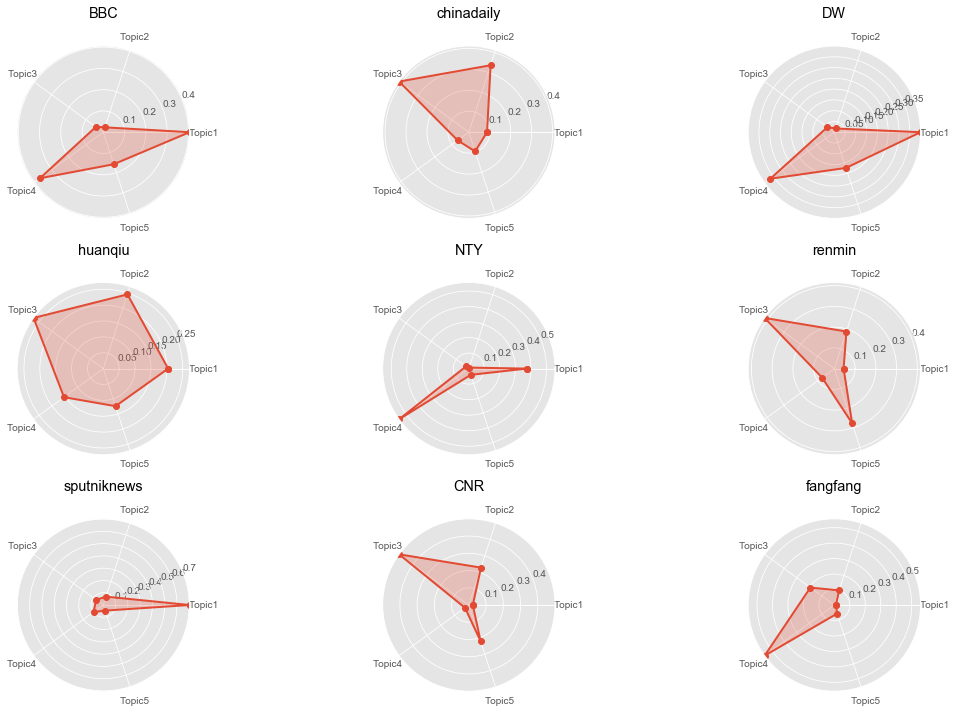

In [242]:
fig=plt.figure(figsize=(20.,10))
for i, item in enumerate(all_res+diary_res):
    title = item[0]
    values = item[1]
    plt.style.use('ggplot')
    feature = ['Topic'+str(i+1) for i in range(modelTool.num_topics)]
    N = len(values)
    angles=np.linspace(0, 2*np.pi, N, endpoint=False)
    values=np.concatenate((values,[values[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    ax = fig.add_subplot(3,3,i+1, polar=True)
    ax.plot(angles, values, 'o-', linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, feature)
    ax.set_ylim(0,max(values))
    plt.title(title,pad=20)
    plt.tight_layout()
    ax.grid(True)
    # 显示图形
plt.show()

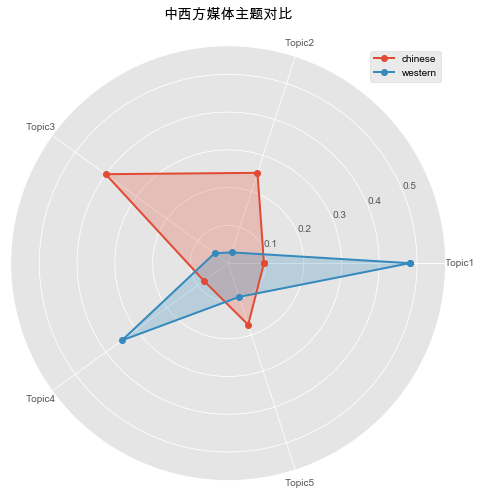

In [243]:
plt.style.use('ggplot')

values2 = wstn_res[0][1]
values = chn_res[0][1]
feature = ['Topic'+str(i+1) for i in range(modelTool.num_topics)]
N = len(values)
angles=np.linspace(0, 2*np.pi, N, endpoint=False)
values=np.concatenate((values,[values[0]]))
values2=np.concatenate((values2,[values2[0]]))
angles=np.concatenate((angles,[angles[0]]))
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, values, 'o-', linewidth=2, label = 'chinese')
ax.fill(angles, values, alpha=0.25)
ax.plot(angles, values2, 'o-', linewidth=2, label = 'western')
ax.fill(angles, values2, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, feature)
ax.set_ylim(0,max(values+values2))
plt.title('中西方媒体主题对比')
ax.grid(True)
plt.legend(loc = 'best')
plt.show()

### 分组可视化

在这个步骤中，我们将对不同的新闻语料库进行分组可视化展示

In [244]:
# visualize
from pylab import mpl

def joincorpus(corp):
    res = []
    for i in range(len(corp)):
        subcorp = corp[i]
        for j in range(len(subcorp)):
            res.append(subcorp[j])
    return res

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
mpl.rcParams['axes.unicode_minus'] = False 
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

#### 媒体语料库

对所有新闻媒体的语料库进行语料库的词频统计。

Total news number:  1929


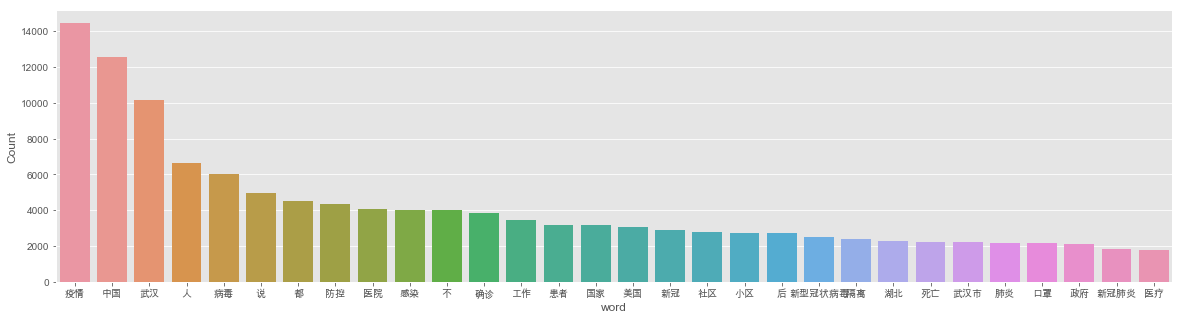

In [245]:
corpus = modelTool.glbcorpus
print('Total news number: ', len(corpus))
v = joincorpus(corpus)
freq_words(v)

#### 西方媒体语料库

对BBC，DW，NYT，sputinews四个西方媒体的语料库进行语料库的词频统计。

Total news number:  1004


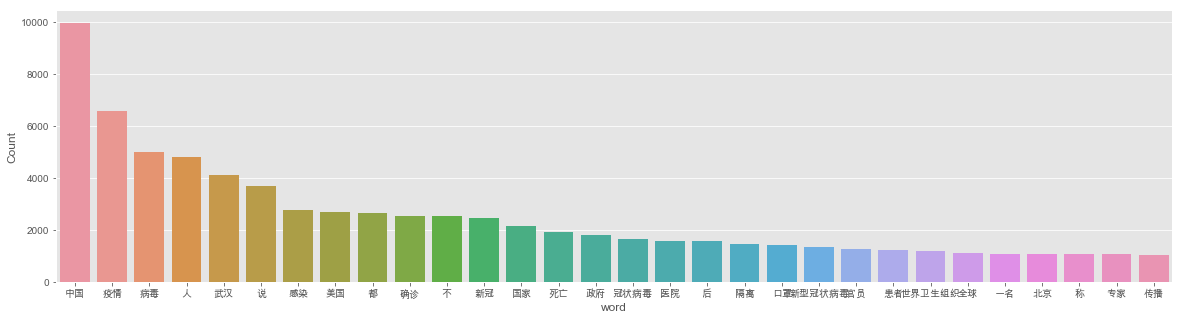

In [246]:
corpus = modelTool.grp_corpus[0]
print('Total news number: ', len(corpus))
v = joincorpus(corpus)
freq_words(v)

#### 中国媒体语料库

对人民网，央广网，中国日报以及环球日报四个中国媒体的语料库进行词频统计。

Total news number:  925


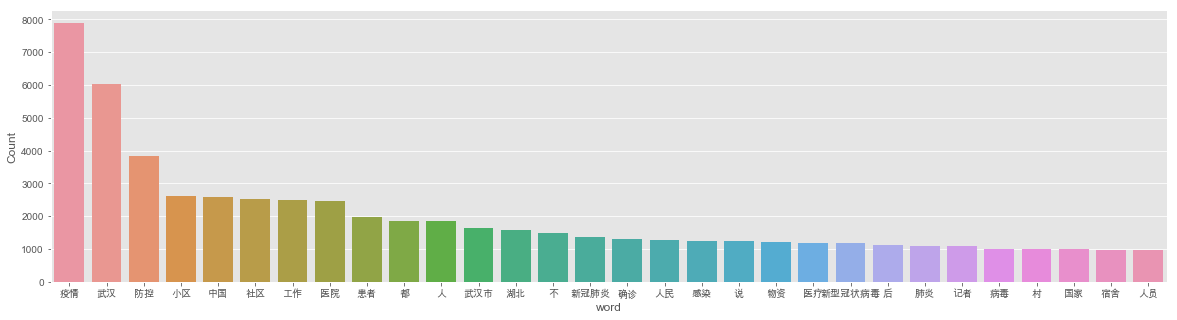

In [247]:
corpus = modelTool.grp_corpus[4]
print('Total news number: ', len(corpus))
v = joincorpus(corpus)
freq_words(v)

#### 中国官媒语料库

对人民网，央广网以及环球日报三个中国媒体的语料库进行词频统计。

Total news number:  724


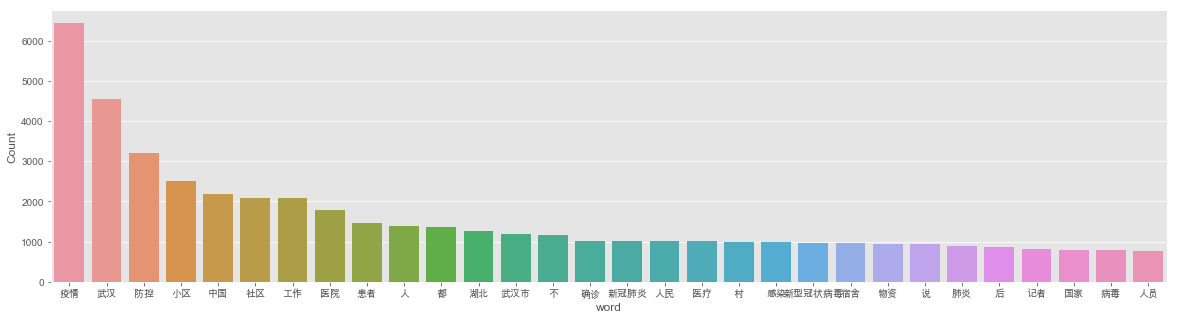

In [248]:
corpus = modelTool.grp_corpus[1]
print('Total news number: ', len(corpus))
v = joincorpus(corpus)
freq_words(v)

#### 中国非官媒语料库

对中国日报（中国非官方媒体）的语料库进行词频统计。

Total news number:  201


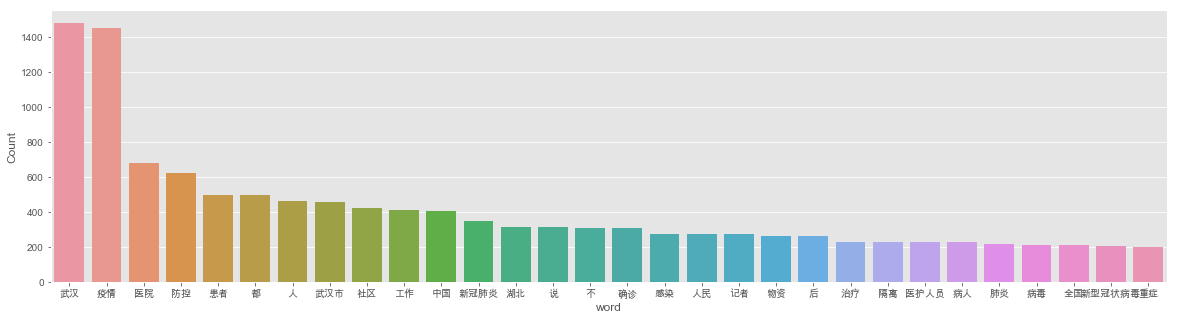

In [249]:
corpus = modelTool.grp_corpus[2]
print('Total news number: ', len(corpus))
v = joincorpus(corpus)
freq_words(v)

#### 方方日记语料库

对方方日记的语料库进行词频统计。

Total news number:  55


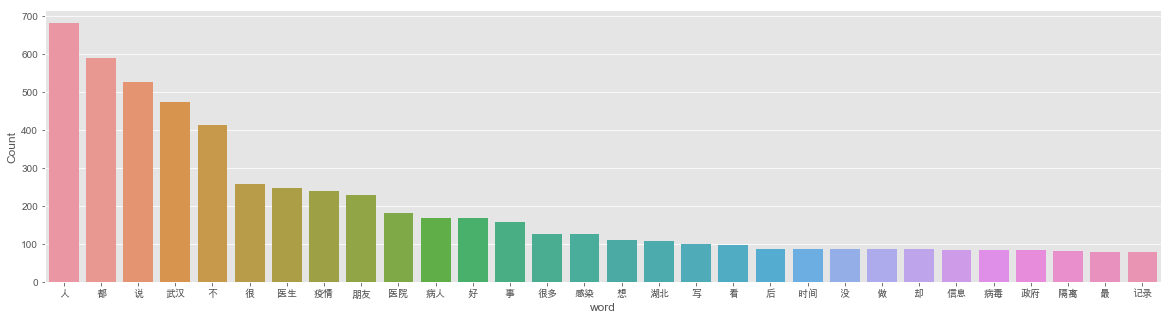

In [250]:
corpus = modelTool.grp_corpus[3]
print('Total news number: ', len(corpus))
v = joincorpus(corpus)
freq_words(v)

Finally, all the results of LDA Model has been input in the html files.
For more detail, plz look at Readme.